#  Perceptron Algorithm

In this tutorial, we will see how to implemenet [Perceptron](https://en.wikipedia.org/wiki/Perceptron) algorithm from scratch.

### **Algorithm :**

**Input:** Sequence of training examples $(x_1, y_1), (x_2, y_2), \ldots$, where $x_i \in \mathbb{R}^n$, $y_i \in \{-1, +1\}$
**Output:** Final weight vector $w \in \mathbb{R}^n$

```text
1. Initialize:      w₁ = 0 ∈ ℝⁿ
2. For t = 1, 2, ...
3.     Sample (xᵢ, yᵢ)
4.     Predict:      ŷ = sign(wₜᵀ xᵢ)
5.     If ŷ ≠ yᵢ then
6.         wₜ₊₁ = wₜ + yᵢ xᵢ
7.     Else
8.         wₜ₊₁ = wₜ
```

## Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Data Preparation

For this project, we will use the [Iris dataset](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html), which contains features for three species of iris flowers:

* *Setosa*
* *Versicolor*
* *Virginica*

Each sample includes four features:

* Sepal length
* Sepal width
* Petal length
* Petal width

### Step 1: Convert to Binary Classification

Since the Perceptron algorithm is designed for **binary classification**, we will modify the dataset:

1. **Remove the third class (*Virginica*)**
   We keep only the samples belonging to *Setosa* and *Versicolor*.

2. **Map class labels from $\{0, 1\}$ to $\{-1, +1\}$**

   * Setosa → `-1`
   * Versicolor → `+1`

This aligns the data with the standard formulation used in Perceptron training.

### Step 2: Select Two Features

To simplify visualization and reduce dimensionality, we will use **only two features**:

* `Sepal width`
* `Petal width`

This allows us to **plot decision boundaries** easily in 2D and understand how the Perceptron separates the two classes.

In [2]:
# Import datasets from sklearn.datasets
data = load_iris()

# Transforms target to binary classification problem
target = data.target
y = target[target != 2]

# Replace all 0 in the target by -1
y = np.where(y==0,-1,y)

# Inputs values
Inputs = data.data

# for simplicity let's keep only two features (columns) (sepal width and petal width)
Inputs = np.hstack([Inputs[:, 1].reshape(-1, 1), Inputs[:, 3].reshape(-1, 1)])

# Remove the last 50 rows in the inputs data (they belong to the class 2)
X = Inputs[:100,:]

# Combines the dataset and Shuffle them
dataset = np.hstack((X,y.reshape(-1,1)))

# Shuffle the dataset and split
n,d = dataset.shape
perm_index = np.random.permutation(n)
dataset_ = dataset[perm_index]

p = 0.8
train_size=round(n*p)
X_train, Y_train = dataset_[0:train_size,0:-1],dataset_[0:train_size,-1]
X_test, Y_test = dataset_[train_size:,0:-1],dataset_[train_size:,-1]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


## Initialize Weights

In [3]:
def initialize_weights(d):
    w = np.random.rand(d)*1e-4
    return w

## Shuffle Data

In [4]:
def shuffle_data(X,y):
      idx = np.random.permutation(X.shape[0])
      return X[idx],y[idx]

## Prediction

In [5]:
def predict(x,w):
    result = np.dot(x, w)
    return np.where(result >= 0, 1, -1)

## Accuracy

In [6]:
def accuracy(y_true,y_pred):
    return np.mean(y_true.flatten()==y_pred.flatten())*100

## perceptron

In [7]:
def perceptron(X,y,iter = 100,tol = 1e-5):
    n,d = X.shape
    w  = initialize_weights(d)
    for epoch in range(iter):
        X,y = shuffle_data(X,y)
        updated = False
        for i in range(n):
            y_pred = predict(X[i],w)
            if y_pred != y[i]:
                w_new = w+ y[i]*X[i]
                if np.linalg.norm(w_new - w) > tol:
                    w = w_new
                    updated = True

        if not updated:
            print(f"Converged at epoch {epoch + 1}")
            break
    return w


## Example Usage

Converged at epoch 2
Accuracy: 100.0


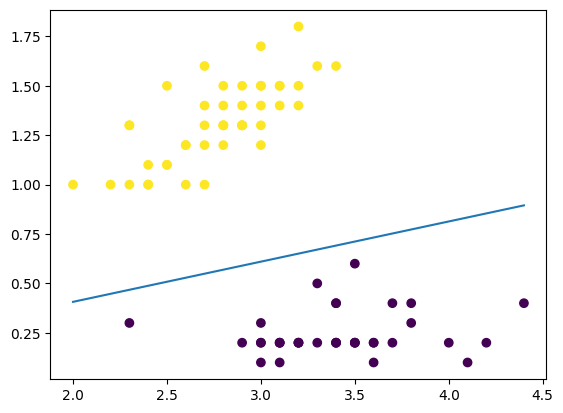

In [8]:
w  = perceptron(X_train,Y_train,iter=200)

y_pred = predict(X_test,w)
print(f"Accuracy: {accuracy(Y_test,y_pred)}")

# Plot
slope = - w[0]/w[1]
min = np.amin(X_train[:, 0])
max = np.amax(X_train[:, 0])
x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_train[:,0], X_train[:, 1], marker="o", c=Y_train)
plt.plot(x1, x2)
plt.show()


## Perceptron Class
Here we have combined all that we have discussed above in to a class. You can see the usage below

In [9]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from ek_ml_package.perceptron import Perceptron

# Generate synthetic binary classification data
X, y = make_classification(
    n_samples=1000,   
    n_features=2,    
    n_redundant=0,  
    n_informative=2,  
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=1.0,     
    random_state=42
)

# Convert labels from {0,1} to {-1,1}
y = np.where(y == 0, -1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and train the perceptron
model = Perceptron(max_iter=1000, tol=1e-5,random_state = 123)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
acc = model.accuracy(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}%")


Test Accuracy: 85.50%
